## Project 1 - Exploratory Data Analysis
#### Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO)
### Dataset Description
#### The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset contains around 37 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate

In [ ]:
import pandas as pd
import numpy as np

1 collect the data & bussiness problem understand

2 EDA

    * statistical analysis like mean, 25%, 50%, 75% percentiles outliers
    * visualisation univariate analysis plots (distribution) box_plot kde,pdf,pmf       
    * Bivariate (2 variables) scatter plot(relationship)
    * Observations --> final insights--> decisions, recommendations
3 Data preperation

    * After breaking train test split
    * converting to numerical information
    * categorical data encoding
    * one hot encoding 
    * categorical 
        nominal cat data
        ordinal cat data -->
    * Scaling-->normalization, standardisation
    * Images --> Feature vector(CNN) 
    * Text --> BOW (bag of words),TFIDF , W2V, Global Vector encoding
4 Data Modeling --> ML & DL

5 Model Evaluation 
    
    * Model is learnt something or not
    * Validation

6 Deployment
    

## Importing Dataset 

In [3]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

## Lets see breif about the dataset using *head* function

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [41]:
df['ComputerScience'].unique()

array([ -1, 407, 346, 376, 500, 438, 315, 253, 469, 192, 530, 284, 223,
       561, 684, 592, 623, 653, 130, 715], dtype=int64)

## Let we know how many columns and rows in the data set using *shape*

In [5]:
df.shape

(3998, 39)

## Columns doesn't make any sense for further analysis
   Because the coloumn contain same value throughout entire dataset so we can remove the resulted coloumns

In [6]:
for i in df.columns:
    if len(df[i].unique()) == 1:
        print(i)

Unnamed: 0


## No of null cells in each column of Dataset

In [7]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

## Univariate Statistics of the dataset for every numerical data 

In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Univariate Analysis

In [65]:
def plotting(data,bins=None):
    plt.figure(figsize=(20,6))
    ax = sns.distplot(x=data,bins=bins,rug=False,fit=norm,rug_kws={"color": "orange"},
                  kde_kws={"color": "r", "lw": 3, "label": "KDE"},
                  hist_kws={ "linewidth": 3,"alpha": 1, "color": "lightgreen"})
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=45)
    plt.show()

In [61]:
def boxplot(d):
    plt.figure(figsize=(30,10))
    sns.boxplot(data=d,color='lightgreen')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


# Let we see indetail about our target column Salary
## Distribution of Salary (Target Column)

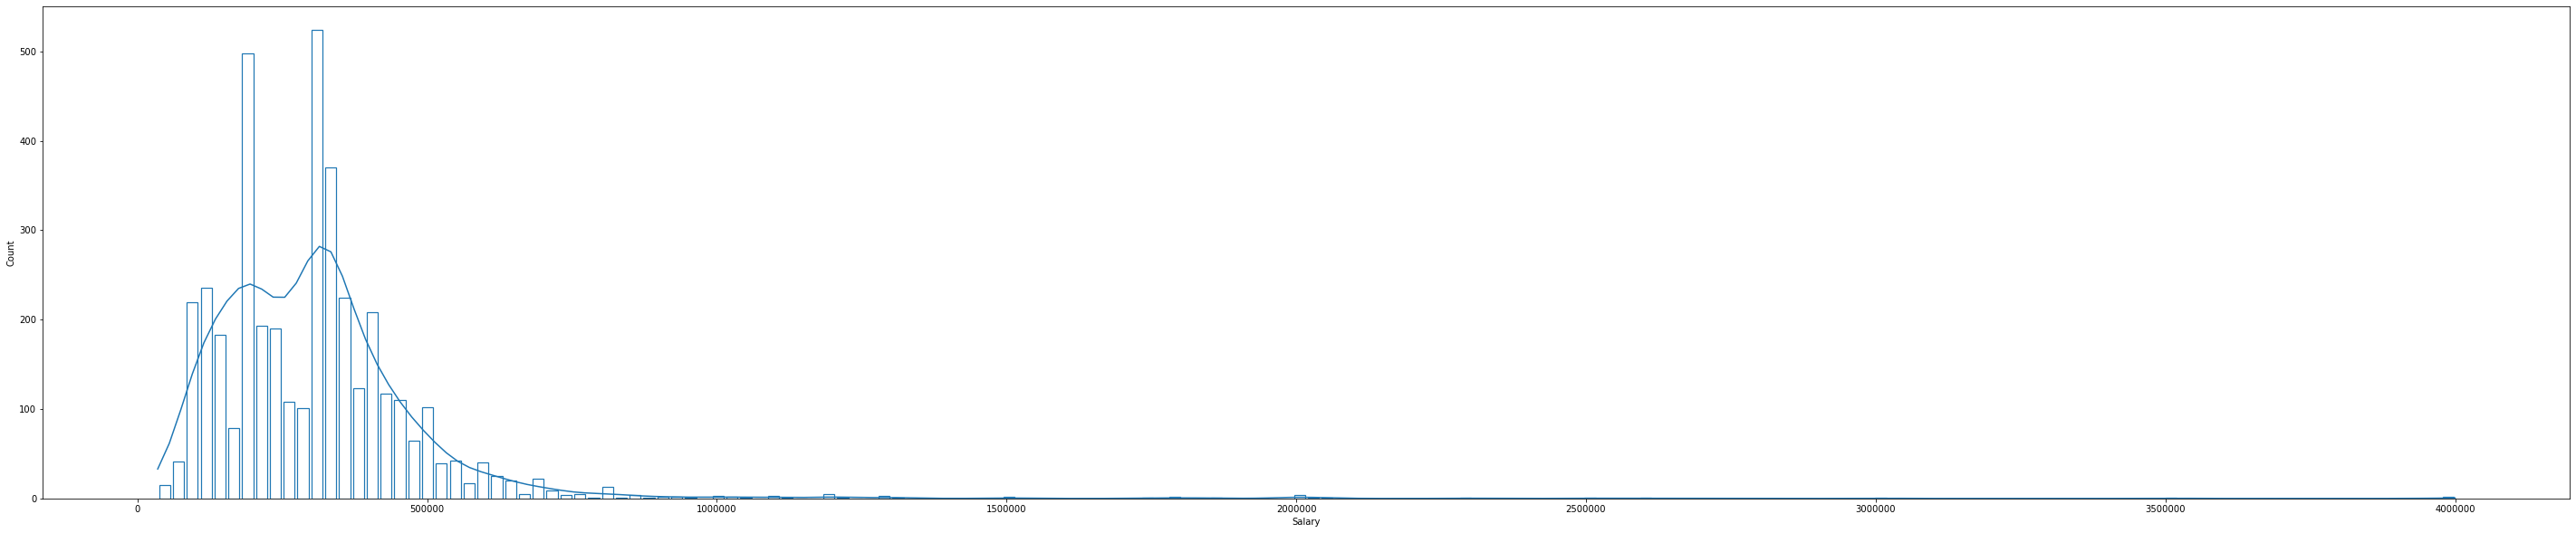

In [54]:
plt.figure(figsize=(50,10))
ax = sns.histplot(df['Salary'],kde=True,shrink=.8,fill=False)
plt.ticklabel_format(style='plain', axis='x')

#### The above graph is histogram for the salary coloum 
#### By the observations average salary is located between 200k to 400k

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


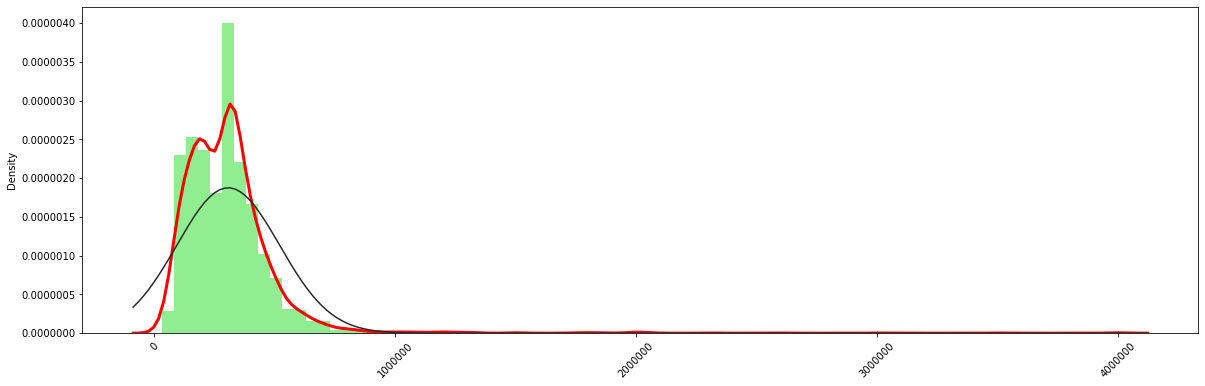

In [66]:
plotting(df.Salary,80)

### The above graph is Probability Distribution Function(PDF) for salaray column 
### Form the above graph we can say that the Salary of data follows Log Normal Distribution

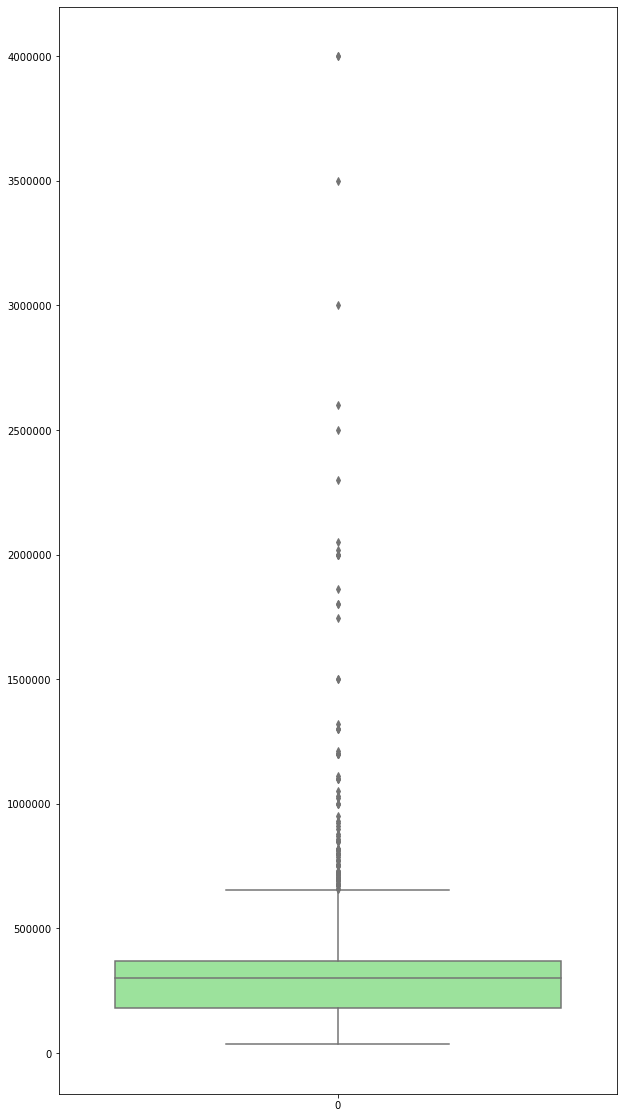

In [37]:
boxplot(df.Salary)

#### From above box plot I observed outliers which are above 650,000 rupees

## Now there are some remaining coloumns which show a major imapct on salary
#### Lets see their distribution

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


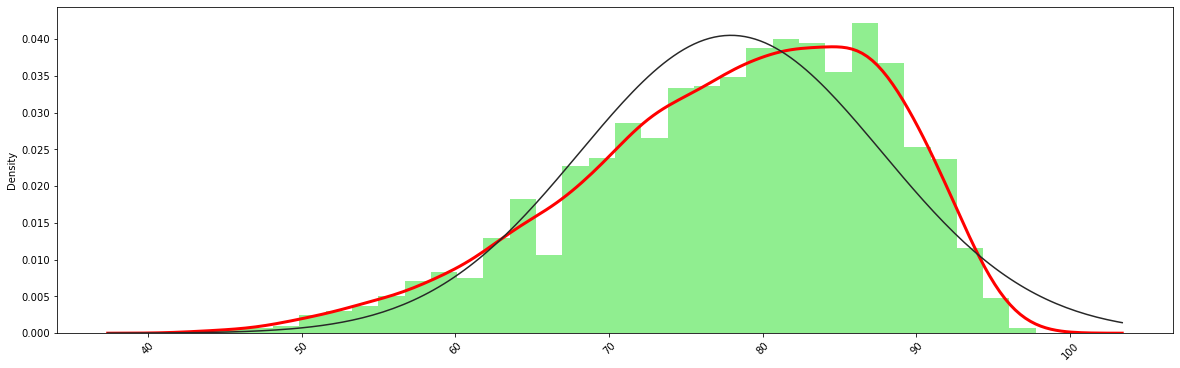

In [67]:
plotting(df["10percentage"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


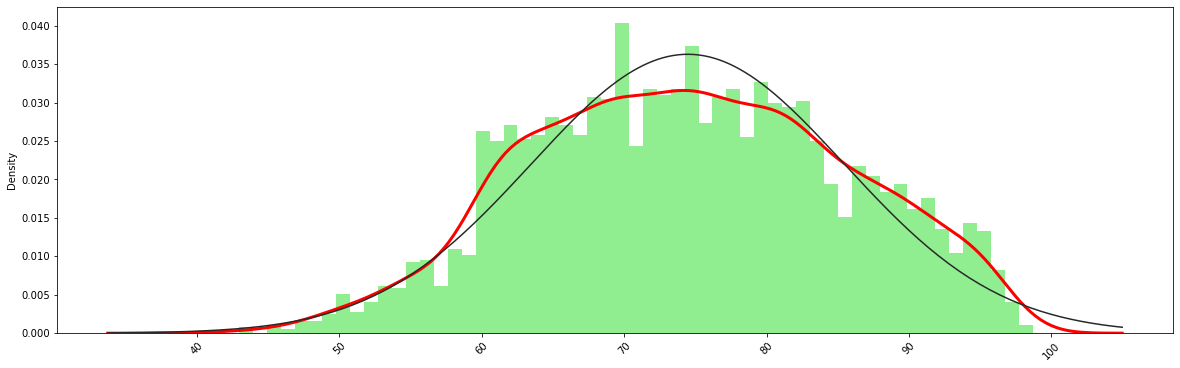

In [68]:
plotting(df['12percentage'],60)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


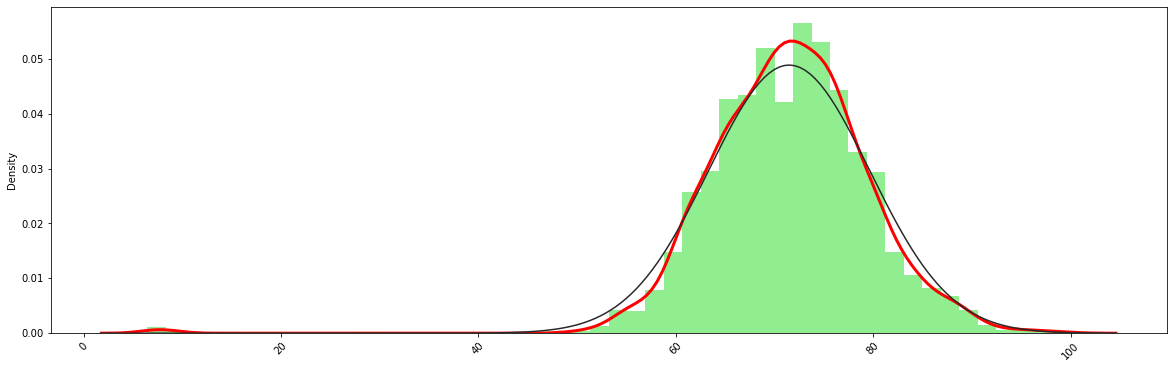

In [69]:
plotting(df.collegeGPA)

In [73]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

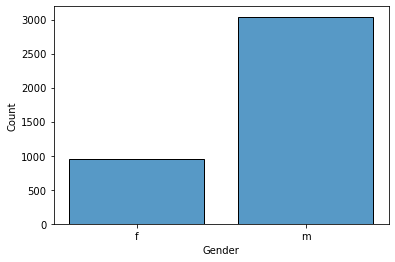

In [83]:
#plt.figure(figsize=(10,10))
ax = sns.histplot(df['Gender'],shrink=.8)

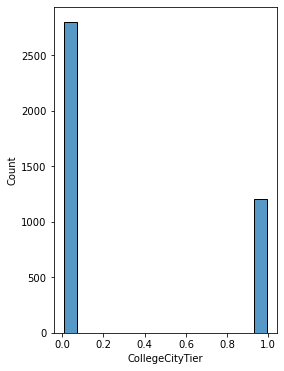

In [102]:
plt.figure(figsize=(4,6))
ax = sns.histplot(df['CollegeCityTier'],shrink=.8)

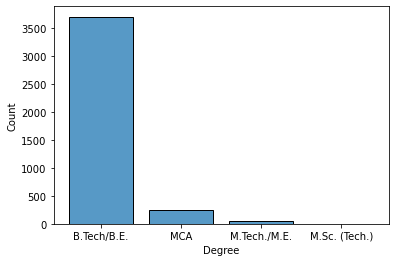

In [90]:
ax = sns.histplot(df['Degree'],shrink=.8)

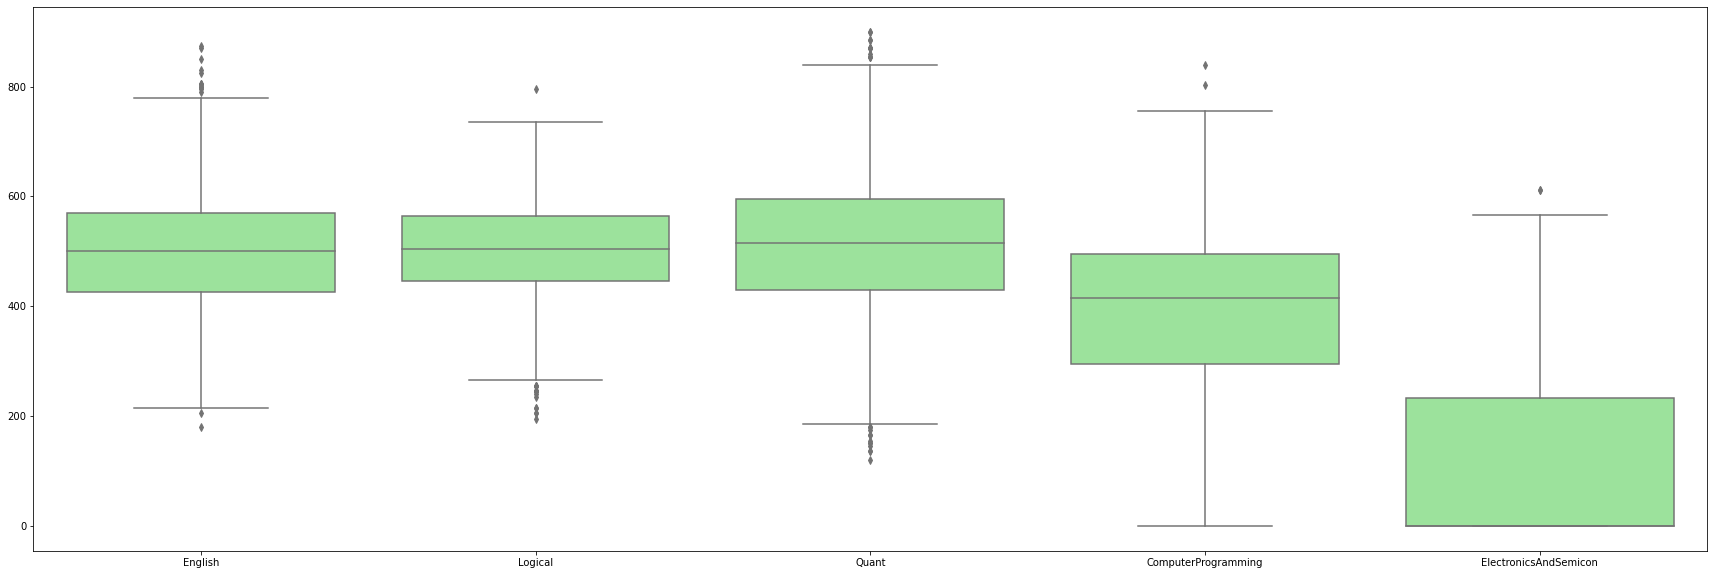

In [117]:
boxplot(df[['English', 'Logical', 'Quant','ComputerProgramming','ElectronicsAndSemicon']])

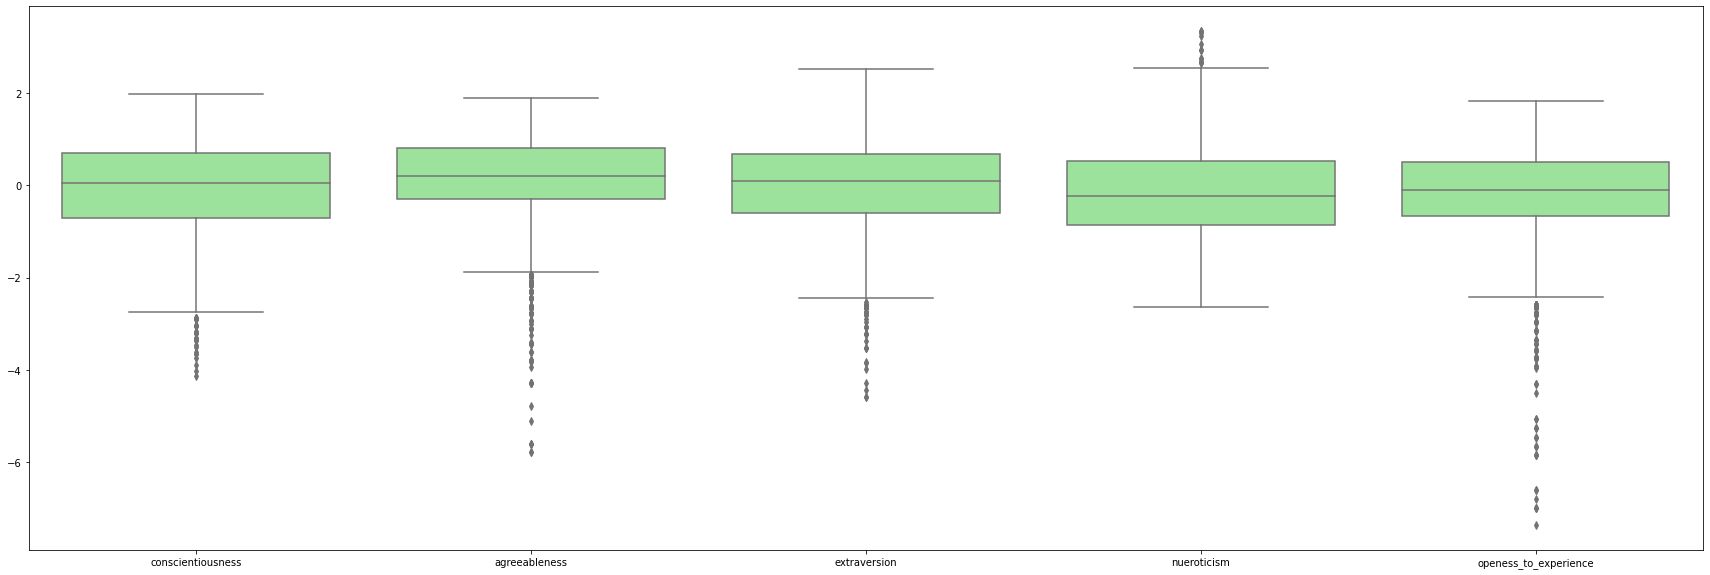

In [119]:
boxplot(df[['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']])

## Bivariate Analysis

In [120]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

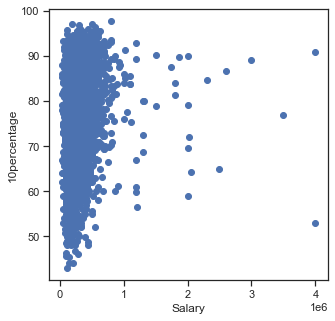

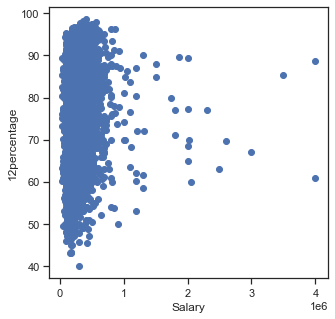

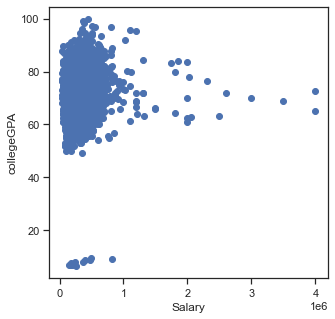

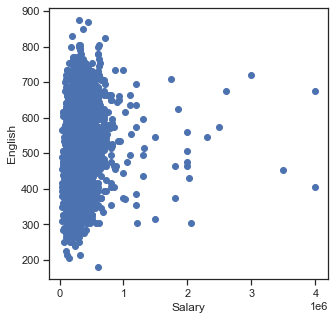

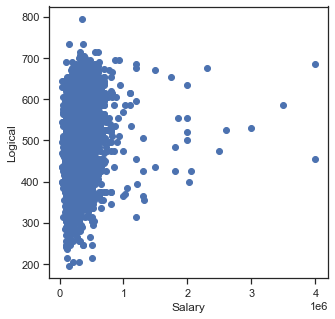

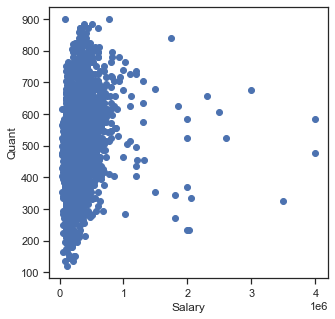

In [143]:
col = ['10percentage', '12percentage','collegeGPA', 'English', 'Logical', 'Quant']
for i in col:
    plt.figure(figsize=(5,5))
    plt.xlabel('Salary')
    plt.ylabel(i)
    x=df['Salary']
    y=df[i]
    plt.scatter(x,y)

<Figure size 1440x1080 with 0 Axes>

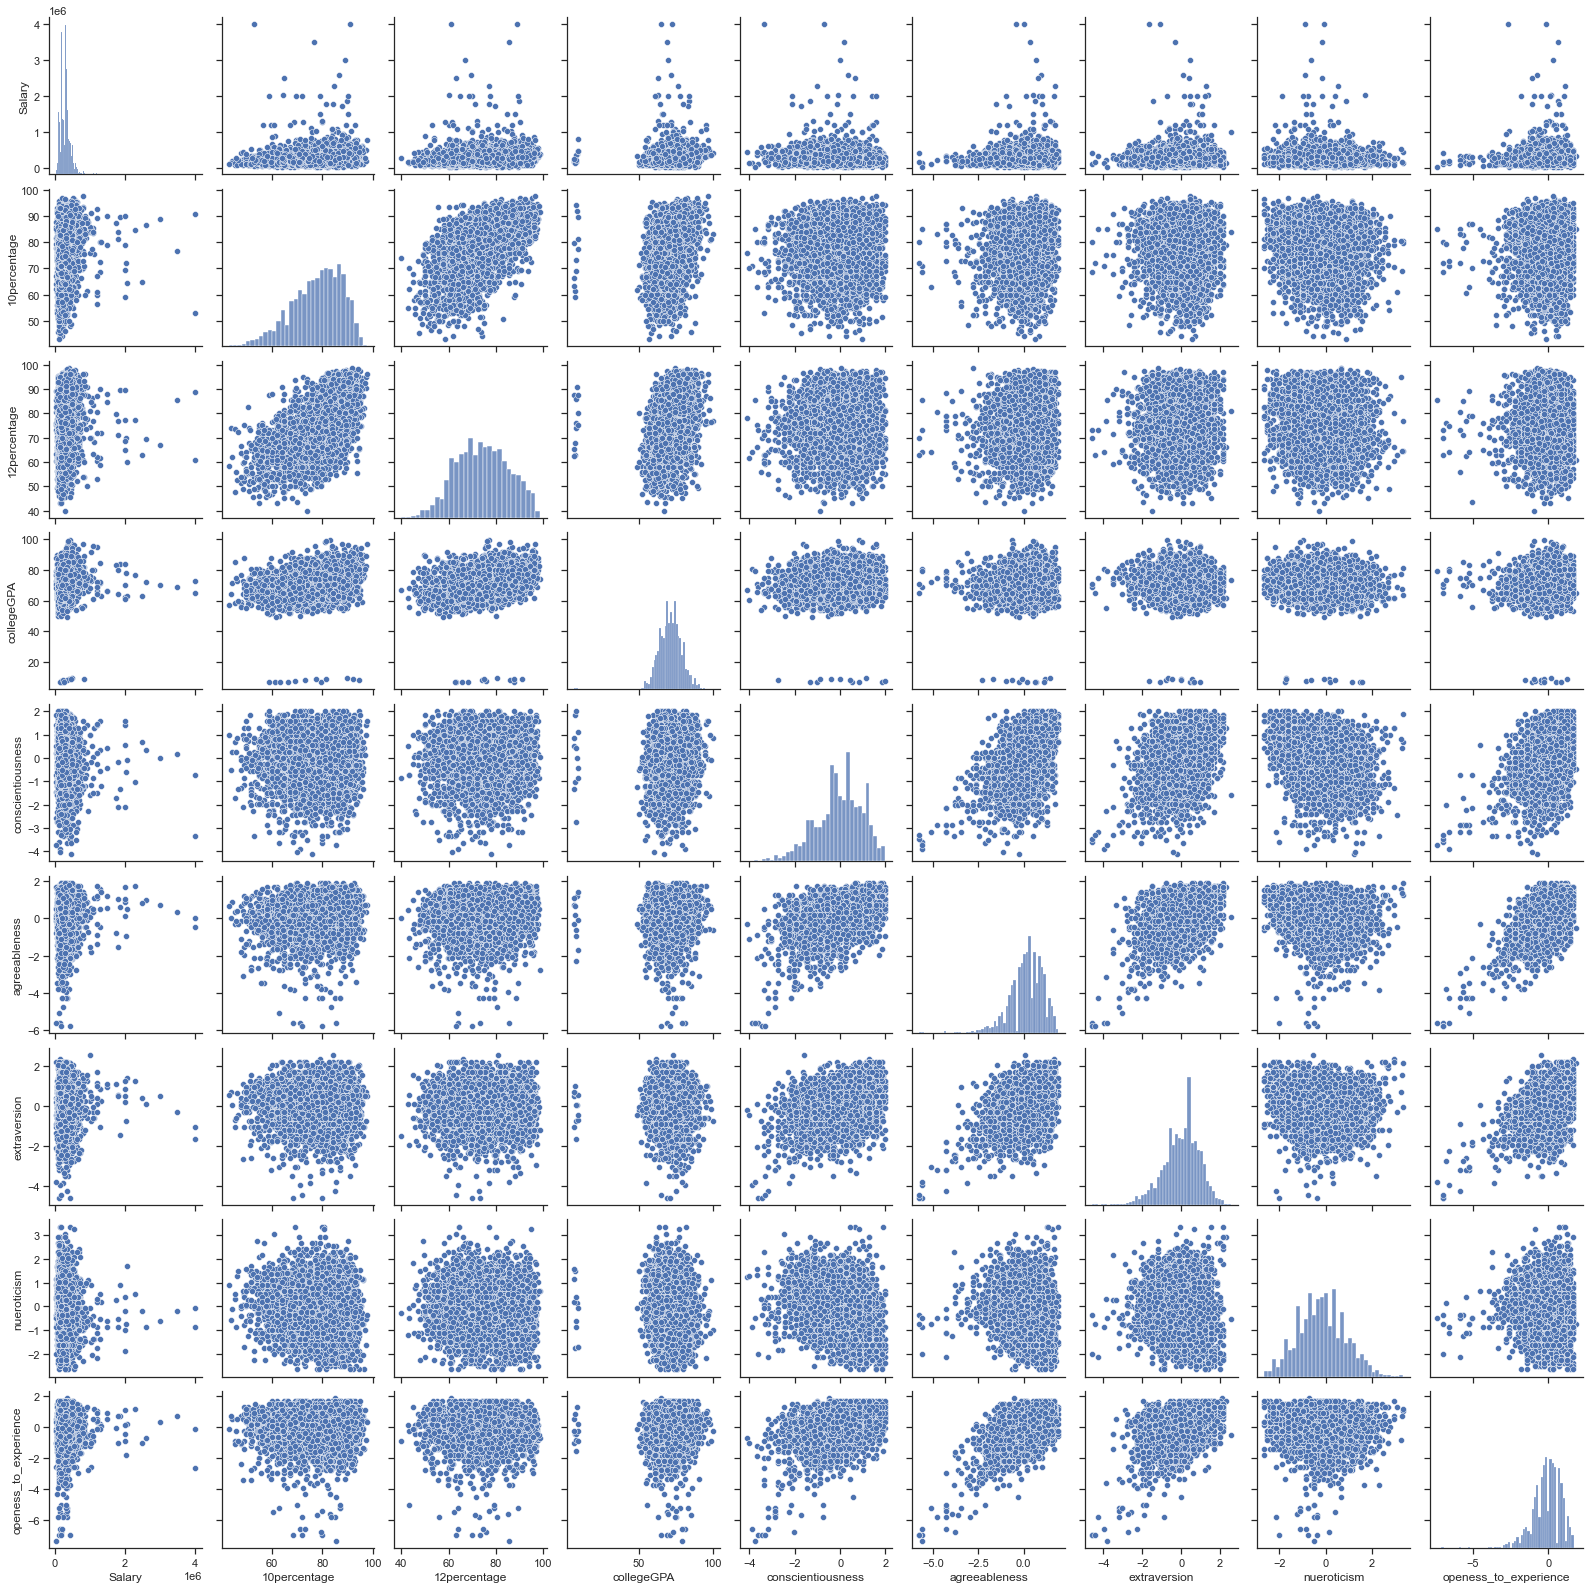

In [144]:
plt.figure(figsize=(20,15))
data = df[['Salary','10percentage','12percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

In [145]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


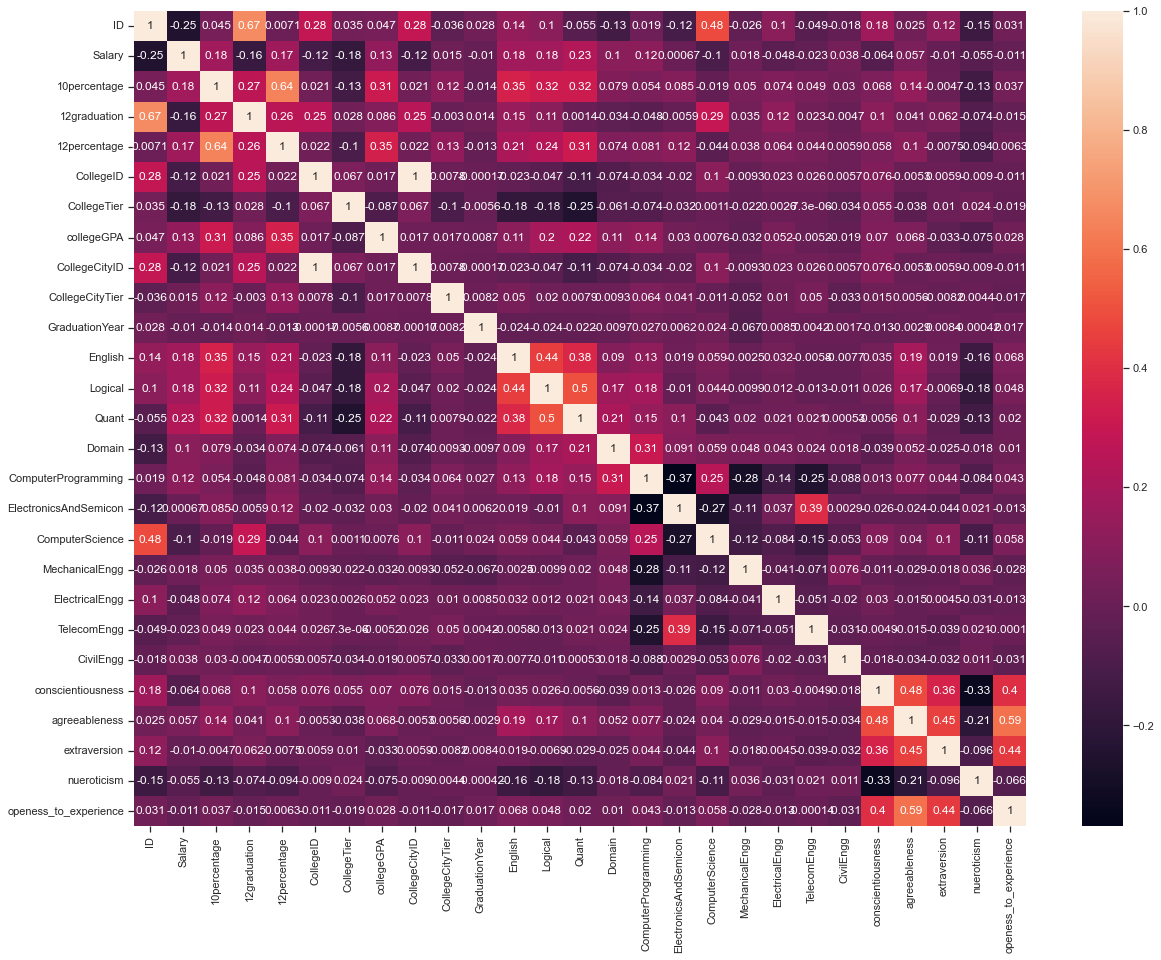

In [148]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot=True)
plt.show()

1.From the above plotted Meatmap we can say that 10percentage and 12percentage is highly positively correlated with each other means if a student got a better marks in 10th standard then it is highly possible that he or she can get the better marks in 12th standard also

2.As we can see that Conscientiousness, Agreeableness, Extraversion, and Openess_to_experience are also highly correlated with each other

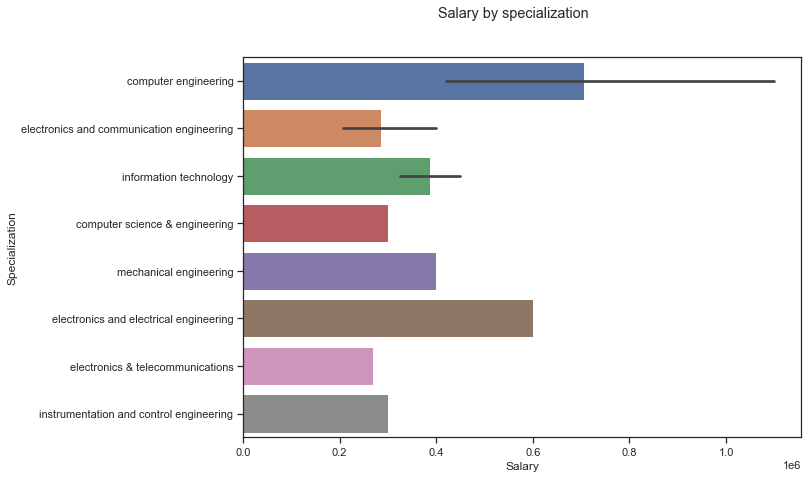

In [146]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Salary'].iloc[:20], y=df['Specialization'].iloc[:15])
plt.suptitle('Salary by specialization')
plt.show()

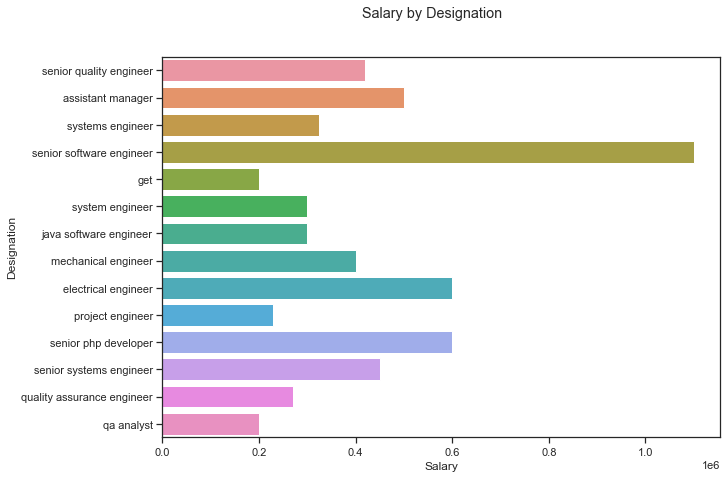

In [147]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Salary'].iloc[:20], y=df['Designation'].iloc[:15])
plt.suptitle('Salary by Designation')
plt.show()

#### So finally I got that most of the amcat aspirants are males most of  them as software engineers degree : specialization as be:cse having exp of 4 yrs and salary around 300 k.
#### So after software engineer,we looked at second highest profession is software developer and  the average salary is 250k
#### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.

### Finally I got that for further step in data science called data modelling i used to preffer the coloumns like their scores in 10th, 12th, and degree cgpa are the features that impacts the salary more